In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecusts-prediction-k-nearest-neighbors/__results__.html
/kaggle/input/telecusts-prediction-k-nearest-neighbors/__resultx__.html
/kaggle/input/telecusts-prediction-k-nearest-neighbors/__notebook__.ipynb
/kaggle/input/telecusts-prediction-k-nearest-neighbors/__output__.json
/kaggle/input/telecusts-prediction-k-nearest-neighbors/custom.css
/kaggle/input/telecusts-prediction-k-nearest-neighbors/__results___files/__results___19_1.png
/kaggle/input/telecusts-prediction-k-nearest-neighbors/__results___files/__results___49_0.png
/kaggle/input/knn-telecust/teleCust1000t.csv


# **Importing the Libraries**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# **Loading the Dataset**

In [3]:
df = pd.read_csv("/kaggle/input/knn-telecust/teleCust1000t.csv")
#"/kaggle/input/telecusts-prediction-k-nearest-neighbors/teleCust.csv"
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


# **Getting to know the dataset**

In [4]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print('-------------------------------------')

region
region
3    344
2    334
1    322
Name: count, dtype: int64
-------------------------------------
tenure
tenure
72    31
24    20
48    20
3     20
5     19
      ..
47     7
36     7
2      7
21     6
63     6
Name: count, Length: 72, dtype: int64
-------------------------------------
age
age
33    39
39    35
35    34
34    32
31    32
37    31
42    28
40    28
30    26
52    25
36    25
46    24
48    24
27    24
43    24
41    24
54    24
45    24
51    23
50    23
25    23
28    22
32    21
47    21
26    21
55    21
38    21
44    20
57    20
24    20
29    19
53    19
49    18
23    16
22    15
59    14
63    12
60    11
56    11
61    11
58    10
64    10
20    10
62     9
21     8
66     7
68     6
69     6
65     6
67     5
19     4
76     3
70     3
75     2
71     1
72     1
74     1
77     1
18     1
73     1
Name: count, dtype: int64
-------------------------------------
marital
marital
0    505
1    495
Name: count, dtype: int64
----------------------------------

In [5]:
df.drop(["ed", "employ"], axis = 1, inplace = True)

In [6]:
df.head()

,region,tenure,age,marital,address,income,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,0.0,0,2,1
1,3,11,33,1,7,136.0,0.0,0,6,4
2,3,68,52,1,24,116.0,0.0,1,2,3
3,2,33,33,0,12,33.0,0.0,1,1,1
4,2,23,30,1,9,30.0,0.0,0,4,3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   retire   1000 non-null   float64
 7   gender   1000 non-null   int64  
 8   reside   1000 non-null   int64  
 9   custcat  1000 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 78.2 KB


# **EDA**

<Axes: >

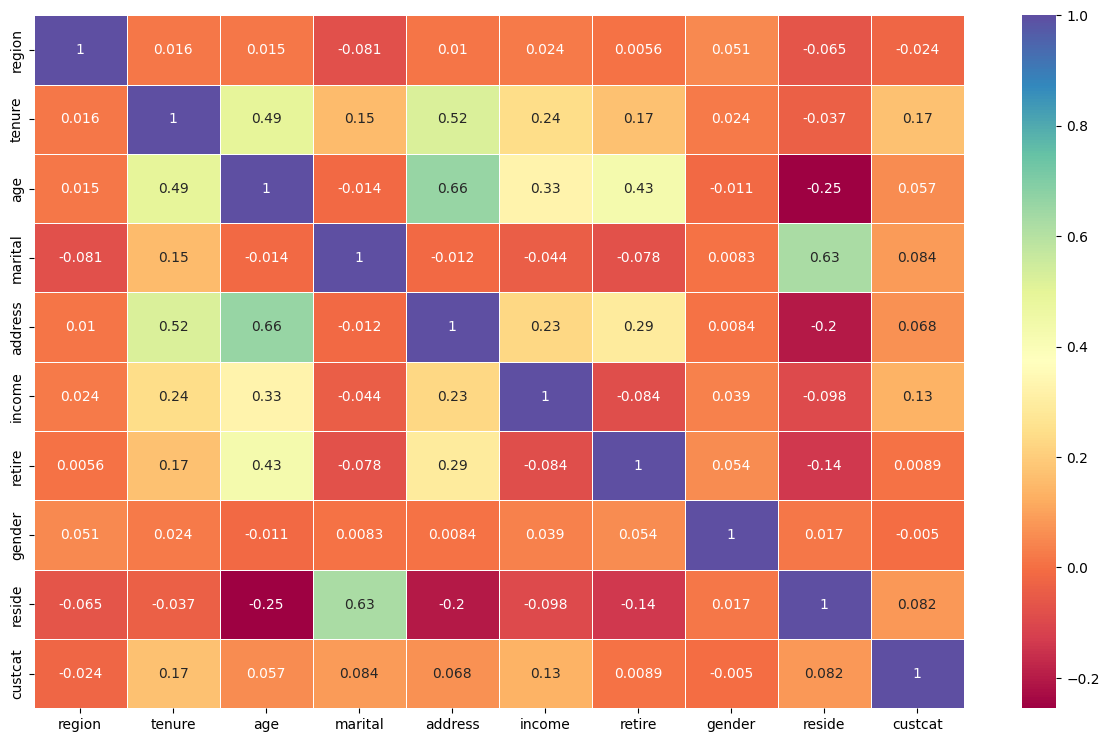

In [8]:
plt.figure(figsize = (15, 9))
sns.heatmap(df.corr(numeric_only = True), annot = True, linewidth = 0.5, cmap = "Spectral")

In [9]:
df.drop(["retire", "gender"], axis = 1, inplace = True)
df.head()

,region,tenure,age,marital,address,income,reside,custcat
0,2,13,44,1,9,64.0,2,1
1,3,11,33,1,7,136.0,6,4
2,3,68,52,1,24,116.0,2,3
3,2,33,33,0,12,33.0,1,1
4,2,23,30,1,9,30.0,4,3


In [10]:
region = pd.get_dummies(df["region"], drop_first = True, prefix = "region")
reside = pd.get_dummies(df["reside"], drop_first = True, prefix = "reside")

In [11]:
df.drop(["region", "reside"], axis = 1, inplace = True)

In [12]:
df = pd.concat([df, region, reside], axis = 1)
df.head()

,tenure,age,marital,address,income,custcat,region_2,region_3,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8
0,13,44,1,9,64.0,1,True,False,True,False,False,False,False,False,False
1,11,33,1,7,136.0,4,False,True,False,False,False,False,True,False,False
2,68,52,1,24,116.0,3,False,True,True,False,False,False,False,False,False
3,33,33,0,12,33.0,1,True,False,False,False,False,False,False,False,False
4,23,30,1,9,30.0,3,True,False,False,False,True,False,False,False,False


# **Standardization od variables**

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaled_variable = df[["tenure", "age", "address", "income"]]

In [15]:
scaled_variable

,tenure,age,address,income
0,13,44,9,64.0
1,11,33,7,136.0
2,68,52,24,116.0
3,33,33,12,33.0
4,23,30,9,30.0
...,...,...,...,...
995,10,39,0,27.0
996,7,34,2,22.0
997,67,59,40,944.0
998,70,49,18,87.0


In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit(scaled_variable)

StandardScaler()

In [18]:
scaled_variable = scaler.fit_transform(scaled_variable)

In [19]:
#scaled_variable.head()

In [20]:
df_scaled = pd.DataFrame(scaled_variable, columns = ["tenure", "age", "address", "income"])
df_scaled.head()

,tenure,age,address,income
0,-1.055125,0.184505,-0.253034,-0.126506
1,-1.148806,-0.691812,-0.451415,0.546450
2,1.521092,0.821826,1.234819,0.359517
3,-0.118319,-0.691812,0.044536,-0.416251
4,-0.586722,-0.930808,-0.253034,-0.444291


In [21]:
df.head()

,tenure,age,marital,address,income,custcat,region_2,region_3,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8
0,13,44,1,9,64.0,1,True,False,True,False,False,False,False,False,False
1,11,33,1,7,136.0,4,False,True,False,False,False,False,True,False,False
2,68,52,1,24,116.0,3,False,True,True,False,False,False,False,False,False
3,33,33,0,12,33.0,1,True,False,False,False,False,False,False,False,False
4,23,30,1,9,30.0,3,True,False,False,False,True,False,False,False,False


In [22]:
df.drop(["tenure", "age", "address", "income"], axis = 1, inplace = True)

In [23]:
df = pd.concat([df, df_scaled], axis = 1)

In [24]:
df.head()

,marital,custcat,region_2,region_3,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8,tenure,age,address,income
0,1,1,True,False,True,False,False,False,False,False,False,-1.055125,0.184505,-0.253034,-0.126506
1,1,4,False,True,False,False,False,False,True,False,False,-1.148806,-0.691812,-0.451415,0.546450
2,1,3,False,True,True,False,False,False,False,False,False,1.521092,0.821826,1.234819,0.359517
3,0,1,True,False,False,False,False,False,False,False,False,-0.118319,-0.691812,0.044536,-0.416251
4,1,3,True,False,False,False,True,False,False,False,False,-0.586722,-0.930808,-0.253034,-0.444291


# **KNN Modelling**

In [25]:
X = df.drop(["custcat"], axis = 1)
y = df["custcat"]

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [27]:
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (800, 14) (800,)
Test set: (200, 14) (200,)


In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
k = 4
knn_model = KNeighborsClassifier(n_neighbors = k)
knn_model.fit(X_train, y_train)
knn_model

KNeighborsClassifier(n_neighbors=4)

In [30]:
y_pred = knn_model.predict(X_test)

In [31]:
from sklearn import metrics
print("Accuracy score:", metrics.accuracy_score(y_test, y_pred))

Accuracy score: 0.325


In [32]:
k = 6
knn_model2 = KNeighborsClassifier(n_neighbors = k)
knn_model2.fit(X_train, y_train)
knn_model2

KNeighborsClassifier(n_neighbors=6)

In [33]:
y_pred = knn_model2.predict(X_test)

In [34]:
print("Accuracy score:", metrics.accuracy_score(y_test, y_pred))

Accuracy score: 0.335


In [35]:
k = 12
knn_model3 = KNeighborsClassifier(n_neighbors = k)
knn_model3.fit(X_train, y_train)
knn_model3

y_pred = knn_model3.predict(X_test)

print("Accuracy score:", metrics.accuracy_score(y_test, y_pred))

Accuracy score: 0.35


In [36]:
k = 72
knn_model4 = KNeighborsClassifier(n_neighbors = k)
knn_model4.fit(X_train, y_train)
knn_model4

y_pred = knn_model4.predict(X_test)

print("Accuracy score:", metrics.accuracy_score(y_test, y_pred))

Accuracy score: 0.375


# **Hyperparameter Optimization**

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
knn_model5 = KNeighborsClassifier()

In [39]:
knn_model5 = KNeighborsClassifier()

In [40]:
knn_params = {"n_neighbors" : np.arange(1,50),
             "metric" : ["ninkowski", "euclidean", "manhattan"],
             "weights": ["uniform", "distance"]}

In [41]:
knn_cv_model = GridSearchCV(estimator = knn_model5, param_grid = knn_params, cv = 10)

In [42]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['ninkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']})

In [43]:
knn_cv_model.best_params_

{'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'uniform'}

In [44]:
knn_tuned = KNeighborsClassifier(n_neighbors = 15)

In [45]:
knn_tuned.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [46]:
y_pred = knn_tuned.predict(X_test)

In [47]:
print("Accuracy score:", metrics.accuracy_score(y_test, y_pred))

Accuracy score: 0.35
